In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial.distance as dist
import itertools
import math
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import av
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:31.997092. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [3]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.004679. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
# '27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat',
                 '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat',
                 '27-Feb_17_33_59_out.mat', '28-Feb_16_21_21_out.mat', '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', 
                  '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.011556. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/b1118/behaviorvideos/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key, '02152021') for fname in ko_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.017730. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [6]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in ko_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.024643. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.030365. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Jan_16_54_31_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Jan_14_00_19_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/31-Jan_01_43_49_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/31-Jan_00_12_24_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/31-Mar_13_28_15_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Mar_21_42_20_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/13-Apr_17_57_40_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Mar_14_27_55_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/13-Apr_16_01_20_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/13-Apr_16_11_27_

In [8]:
tracking_files[-3:-2]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.040480. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/b1118/behaviorvideos/GRIN012_H17_M46_S35/GRIN012_H17_M46_S35_dlc_tracking_foranalysis_02152021.csv']

In [9]:
grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list[-3:-2], tracking_files[-3:-2]):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)
        # create tracking time deltas
        #interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)
        interpolated = pd.read_csv(tracking_file)
        interpolated.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
        interpolated_td = interpolated.set_index(pd.to_timedelta(np.linspace(interpolated['sysClock'].iloc[0], 
               interpolated['sysClock'].iloc[-1]/1000,
               len(interpolated)), unit='s'), drop=True)
        #C_z_scored_filtered = utils_jjm.filter_out_by_size(C_z_scored, cell_contours, for_dims, 0.6, 100)
        #store results 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_z_scored': C_z_scored, 'C_normalized': C_normalized, 'C_normalized_z_scored': C_normalized_z_scored, 
                                                          'interpolated' : interpolated_td, 'com' : com_df, 'spatial_components' : spatial_components, 'cell_contours': cell_contours,  
                                                         'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.046747. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/13-Apr_16_01_20_out.mat
/projects/b1118/behaviorvideos/GRIN012_H17_M46_S35/GRIN012_H17_M46_S35_dlc_tracking_foranalysis_02152021.csv


## triggered averaging 

In [10]:
success

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.053657. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


[('GRIN012_H17_M46_S35', '13-Apr_16_01_20_out.mat')]

In [11]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['interpolated'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=50)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.060865. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [12]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    # get indicies of small cells 
    cells_to_drop = np.array([int(cell) for cell in range(1, len(grouped_raw_data[session]['cell_contours'])+1) if 
                              len(np.array(np.where(grouped_raw_data[session]['for_dims'][cell]>0.6)[0]))<100])
    C_traces_filtered = grouped_raw_data[session]['C_normalized'].drop(cells_to_drop, axis=1)
    filtered_for_analysis[session] = C_traces_filtered.drop('msCamFrame', axis=1)

# sets sampling interval to 5Hz to correspond to behavior data 
C_norm_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(filtered_for_analysis.keys())], axis=1, keys=list(filtered_for_analysis.keys()))

# after downsampling convert back to regular index, timedelta is behaving oddly 
C_norm_df_reindexed = pd.concat([C_norm_df[session].reset_index(drop=True)
                  for session in list(set(C_norm_df.columns.get_level_values(0)))], axis=1, keys=list(set(C_norm_df.columns.get_level_values(0))))
# drop columns with all nan values
#C_norm_df_reindexed.dropna(axis=1, how='all', inplace=True)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.066218. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [13]:
list(set(C_norm_df.columns.get_level_values(0)))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.071762. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['GRIN012_H17_M46_S35']

In [14]:
# do same for velocity dataframe
V_df_reindexed = pd.concat([V_df.loc[session].reset_index()
                            for session in list(set(V_df.index.get_level_values(level=0)))], keys=list(set(V_df.index.get_level_values(level=0)))) 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.076567. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [15]:
#bin by activity threshold (body_part, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold)
binned_velocity_df = pd.DataFrame([dlc_utils.bin_by_activity_threshold(V_df.loc[session]['tail_base'], 80, 20, 1, 2, 3)
                                for session in list(grouped_raw_data.keys())], index=list(grouped_raw_data.keys()))
binned_velocity_df = binned_velocity_df.transpose()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.081918. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/post_cmfe_analysis/dlc_utils.py:114: RuntimeWarning: invalid value encountered in greater
  elif df_column[point] > crossing_threshold and (np.mean(df_column.values[point+1:point+active_time_threshold] > activity_threshold)):


In [16]:
#plt.plot(V_df_reindexed.loc['GRIN012_H17_M46_S35']['tail_base'])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.086520. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [17]:
#plt.plot(binned_velocity_df)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.091710. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [18]:
#need to make sure x axis from velocity binned df matches axis from grouped raw data 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.131765. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [19]:
regions_by_session = {}
to_concat = []
for session in list(grouped_raw_data.keys()):
    # gets indicies where animal crosses a velocity threshold
    crossing_indicies = [sample for sample in utils_jjm.select_trigger_regions(binned_velocity_df[session], 0.5, 0.5, 20) if sample<len(C_norm_df_reindexed[session])]
    # for each cell average the basseline ~10 seconds before crossing the velocity threshold    
    if len(crossing_indicies)>0:
        print(session)
        movement_regions_in_recording = {}
        # only include samples that are within range of miniscope data
        for sample in crossing_indicies:
            raw_data_to_baseline = C_norm_df_reindexed[session]

            # so say baseline is 80 samples to 20 samples before threshold
            baseline_region = raw_data_to_baseline[sample-80:sample-20].reset_index(drop=True)
            movement_region = raw_data_to_baseline[sample-80:sample+80].reset_index(drop=True)

            baseline_region_std_dev = baseline_region.std(axis=0)
            baseline_region_mean = baseline_region.mean(axis=0)

            movement_region_z_scored = pd.DataFrame((movement_region-baseline_region_mean.values)/baseline_region_std_dev)
    
            movement_regions_in_recording[sample] = movement_region_z_scored
        regions_by_session[session] = pd.concat(movement_regions_in_recording, axis=1, keys=crossing_indicies)
        to_concat.append(session)
    
z_scored_regions_by_session = pd.concat(list(regions_by_session.values()), axis=1, keys=to_concat)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:19:32.391077. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


GRIN012_H17_M46_S35


In [21]:
session = to_concat[0]
session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = np.array([sample_idx for sample_idx in session_df.columns.levels[0] if sample_idx in session_df.columns])
print('session:', session)
print('threshold crossing indicies:' , sample_crossing_indicies)
print('cell indicies:' , list(set(z_scored_regions_by_session[session].columns.get_level_values(1))))

session: GRIN012_H17_M46_S35
threshold crossing indicies: [1467 2285 2419 3140]
cell indicies: [1, 2, 3, 4, 6, 7, 8]


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:21:02.833482. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [24]:
session_seconds = np.array([(time.seconds+(time.microseconds/10**6)) for time in list(grouped_raw_data[session]['interpolated'].index)])
index = sample_crossing_indicies[0]
seconds_time = (V_df_reindexed.loc[session].loc[index]['index'].seconds+(V_df_reindexed.loc[session].loc[index]['index'].microseconds/10**6))
index_in_tracking_df = np.argmin(abs(session_seconds-seconds_time))

frame_threshold_crossing = grouped_raw_data[session]['interpolated'].iloc[index_in_tracking_df]['behavCam_frames']
behavCam_video = int(frame_threshold_crossing/1000)
frames_within_video =frame_threshold_crossing%1000
print('event occurs at ', frame_threshold_crossing, ' frames')
print('behavCam ', behavCam_video, ' at ', frames_within_video, ' frames')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:52:15.908929. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


event occurs at  8803.0  frames
behavCam  8  at  803.0  frames


In [25]:
# load video 
frame_region = (int(frames_within_video)-50, int(frames_within_video)+50)
video = av.open('/projects/b1118/behaviorvideos/GRIN012_H17_M46_S35/behavCam18DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4')
total_frames = video.streams.video[0].frames
movie_images = {}
for i, frame in enumerate(video.decode(video=0)):
    img = frame.to_image()  # PIL image
    movie_images[i] = img
    if i%1000==0:
        print("Frame: %d/%d ..." % (i, total_frames))
video.close()
movie_shape = np.shape(movie_images[1])
frame_subset = [movie_images[i] for i in range(frame_region[0], frame_region[1])]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:52:30.240789. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


Frame: 0/1000 ...


In [26]:
movie_shape

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-18 15:52:39.836950. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(468, 480, 3)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 18:12:03.364065. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


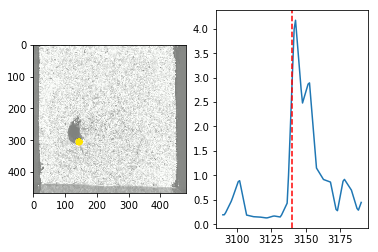

In [289]:
fig, (ax1, ax2) = plt.subplots(1, 2)
im = ax1.imshow(frame_subset[0])
ax2.plot(np.linspace(index-50, index+50, 100), V_df.loc[session]['tail_base'][index-50:index+50])
ax2.axvline(x=(index), linestyle='--', color='r')
#ani = animation.ArtistAnimation(fig, matplotlib_images, interval=50, blit=True, repeat_delay=1000)
#HTML(ani.to_html5_video())
def init():
    im.set_data(frame_subset[0])
def animate(i):
    im.set_data(frame_subset[i])
    #ax2.axvline(x=(index-(50+i)), linestyle='--', color='r')
    return im

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frame_subset), interval=50)
rc('animation', html='jshtml')
#HTML(ani.to_html5_video())

In [288]:
ani

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 18:08:13.612327. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [ ]:
#

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 17:21:10.260748. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


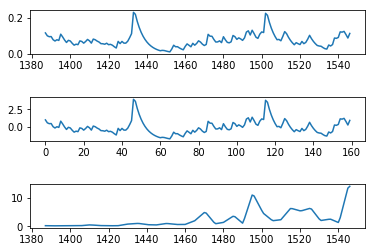

RMS noise: 0.9889089116141996
Peak: 3.944250602193519
Peak/RMS: 3.988487266997427


In [219]:
##plot individual cell activity
#raw "pre z score" region
#zscores
#velocity
sample=index
cell = 1
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(C_norm_df_reindexed[session][cell][sample-80:sample+80]) 
ax2.plot(z_scored_regions_by_session[session][sample][cell])
ax3.plot(V_df_reindexed.loc[session]['tail_base'][sample-80:sample+80]) 
plt.subplots_adjust(hspace=1)
plt.show()

#display rms noise for trace 
rms = np.sqrt(np.mean(np.square(z_scored_regions_by_session[session][sample][cell])))
peak = np.max(z_scored_regions_by_session[session][sample][cell])
print('RMS noise:', rms)
print('Peak:', peak)
print('Peak/RMS:', peak/rms)

In [220]:
## plot cell contour 
# "spatial components", or "A" as dense matrix 
cell_contour = grouped_raw_data[session]['spatial_components'][:, cell]
# create movie
frame_range = [0, len(z_scored_regions_by_session[session][sample][cell])]
frame_range[1]
#dims=(752, 480)
d1 = 752
d2 = 480
A_cell_reshaped = np.reshape(cell_contour, (d2, d1))
C_cell_trace = z_scored_regions_by_session[session][sample][cell]
response_movie = np.array([np.dot(A_cell_reshaped, C_cell_trace[frame]) for frame in range(frame_range[0], frame_range[1])])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 17:21:17.029178. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [221]:
## plot responses of all cells during movement events
all_cell_contours = grouped_raw_data[session]['spatial_components'][:, :]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 17:21:18.985171. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [222]:
#using RGBA for color, each pixel has 3 values for RBG and last for intensity 
cells_reshaped = np.empty((np.shape(all_cell_contours)[1], frame_range[1], d2, d1))
#cells_reshaped_color = np.empty((np.shape(all_cell_contours)[1], frame_range[1], d2, d1, 4))
for cell in tqdm(list(set(z_scored_regions_by_session[session].columns.get_level_values(1)))):
    A_reshaped = np.reshape(all_cell_contours[:, cell], (d2, d1))
    #cell_frames = []
    #for frame in range(frame_range[0], frame_range[1]):
        #cell_frames.append(np.array([np.dot(A_reshaped, item) for item in [255, 128, 0, z_scored_regions_by_session[session][sample][cell][frame]]]))
    cells_reshaped[cell] = np.array([np.dot(A_reshaped, z_scored_regions_by_session[session][sample][cell][frame]) for frame in range(frame_range[0], frame_range[1])])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-15 17:21:20.341279. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
 86%|████████▌ | 6/7 [00:04<00:00,  1.36it/s]


IndexError: index 8 is out of bounds for axis 1 with size 8

In [49]:
cells_recombined = np.sum(cells_reshaped, axis=0)
response_movie = np.sum(response_movie, axis=0)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-11 12:17:09.185104. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [50]:
## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = cells_recombined

fig = plt.figure()
im = plt.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

## need ffmpeg on quest
HTML(anim.to_html5_video())

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-11 12:17:15.422873. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [80]:
## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = cells_recombined
video_2 = response_movie

fig = plt.figure()
p1 = fig.add_subplot(1,2,1)
im = p1.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)
p2 = fig.add_subplot(1,2,2)
im2 = p2.imshow(video_2[0,:,:], cmap='gray', vmin=0, vmax=255)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])
    im2.set_data(video_2[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    im2.set_data(video_2[i,:,:])
    return (im, im2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

## need ffmpeg on quest
HTML(anim.to_html5_video())

In [ ]:
## how to compare with raw traces? maybe use sample indicies to determine specific avi files, then pull from those (w/direct mount to resfiles?), or automate a globus script? 

In [ ]:
# pause to take input (y/n) to determine if trace is ideal 

In [ ]:
# calculate the peak to rms ratio for each threshold event, each cell, and across all cells and events 

peak_rms = lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence)))

cell = 2
event = 1097

peak_rms_ratio_cell = z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio_event = z_scored_regions_by_session['GRIN039_H12_M26_S54'][event].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio = z_scored_regions_by_session['GRIN039_H12_M26_S54'].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)

In [ ]:
#histogram of all peak to rms ratios across sample events
plt.hist(peak_rms_ratio, 100)
plt.show()

In [ ]:
z_scored_regions_by_session.max()

In [ ]:
peak_rms_ratio.max()

In [ ]:
# plot average activity of a cell across all movement events 

In [ ]:
# plots the activity of a cell across all movement threshold crossings in a given session
cell = 1
z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].head()

In [ ]:
# plot a few example traces
events_to_plot = [0, 1, 5]
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4)
ax1.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]])
ax2.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]])
ax3.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]])
ax4.plot(pd.concat([z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]],
                   z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]],
                  z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]]], axis=1).mean(axis=1))

In [ ]:
#concat by mouse 
concacted_by_mouse = {}
for mouse in [name[0:7] for name in list(set(z_scored_regions_by_session.columns.levels[0]))]:
    dfs_by_mouse = []
    sessions = []
    for session in list(z_scored_regions_by_session.columns.levels[0]):
        if mouse in session:
            if not(z_scored_regions_by_session[session].empty):
                #means = z_scored_regions_by_session[session].mean(axis=1, level=0)
                dfs_by_mouse.append(z_scored_regions_by_session[session])
                sessions.append(session)
    if len(dfs_by_mouse)>0:
        concacted_by_mouse[mouse] = pd.concat(dfs_by_mouse, axis=1, keys=sessions)
combined_by_mouse = pd.concat(list(concacted_by_mouse.values()), axis=1, keys=list(concacted_by_mouse.keys()))

In [ ]:
# maybe should do min, max scaler here
plt.plot(combined_by_mouse.mean(axis=1))

In [ ]:
# create range scaled data to compare across cells
scaler = MinMaxScaler()
activity_scaled = pd.DataFrame(scaler.fit_transform(combined_by_mouse), columns=combined_by_mouse.columns)
activity_scaled_cell_means = activity_scaled.groupby(level=[0,1], axis=1).mean()

In [ ]:
plt.plot(activity_scaled.mean(axis=1))

In [ ]:
combined_by_mouse_timedelta = combined_by_mouse.set_index(pd.to_timedelta(np.linspace(0, (len(combined_by_mouse)-1)*(1/5), len(combined_by_mouse)), unit='s'), drop=True)

In [ ]:
#resampled_for_plotting.head()

In [ ]:
plt.rcParams.update({'font.size': 22})
df_to_plot = resampled_for_plotting
activity_measure = 'spatial_coordination'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
scale_f = 0.0868
mean=df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f
plt.plot(x, df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f, color='k')
std_error = ((df_to_plot.std(axis=1, level=2)['velocity'])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]))*scale_f
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('velocity cm/sec')
ax.set_xlabel('time (seconds)')
ax.axvline(x=(0), linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('/home/jma819/presentation_files/wt_velocity_spatial_coord_triggered.svg', transparent=True)
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/v_triggered.pdf', transparent=True)
plt.show()

In [ ]:
activity_measure = 'fluorescence'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
mean = df_to_plot.mean(axis=1, level=2)[activity_measure].values
plt.plot(x, mean, color='k')
std_error = (df_to_plot.std(axis=1, level=2)[activity_measure])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]*1)
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('dF/F z-score')
ax.set_xlabel('time (seconds)')
ax.axvline(x=0, linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('.svg')
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/wt_fluorescence_triggered.pdf', transparent=True)
plt.show()

## event ISIs 

In [ ]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))

In [ ]:
C_df = C_df.drop(['msCamFrame'], axis=1)

In [ ]:
ISIs_by_session = []
for session in list(grouped_raw_data.keys()):
    print(session)
    event_indicies, event_times, event_ISIs = utils_jjm.get_ISIs(C_df.loc[session].dropna(axis=1), 20, .1, np.array(C_df.loc[session].dropna(axis=1).columns), 2)
    ISIs_by_session.append(event_ISIs)